In [1]:
import pandas as pd
from prophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

In [93]:
df = pd.read_excel(r'C:\Users\rtekem\OneDrive - Vishay Intertechnology, Inc\Desktop\Machine_Learning_project\IMPUT\Sales forecasting by product line and region\DF_FP6.xlsx')

df.head()

C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



,Period,Material Grp 3,REGION,Billings EURO,Blg Total Qty,BACKLOG EUR
0,201801,FP6,AMERICA,2289.90,0,0.000000
1,201801,FP6,ASIA,12544.50,1900,10945.022000
2,201801,FP6,EUROPE,155634.10,12412,162066.684368
3,201802,FP6,AMERICA,175.52,20,180.687940
4,201802,FP6,ASIA,15337.03,1592,3623.771504


In [95]:
df['Period'] = pd.to_datetime(df['Period'].astype(str), format='%Y%m')

In [97]:
df.shape

(237, 6)

In [99]:
df=df.drop(['Material Grp 3'],axis=1)

In [101]:
df

,Period,REGION,Billings EURO,Blg Total Qty,BACKLOG EUR
0,2018-01-01,AMERICA,2289.90,0,0.000000
1,2018-01-01,ASIA,12544.50,1900,10945.022000
2,2018-01-01,EUROPE,155634.10,12412,162066.684368
3,2018-02-01,AMERICA,175.52,20,180.687940
4,2018-02-01,ASIA,15337.03,1592,3623.771504
...,...,...,...,...,...
232,2025-08-01,EUROPE,0.00,11228,113410.508000
233,2025-09-01,EUROPE,0.00,5219,173064.612000
234,2025-10-01,EUROPE,0.00,16317,276593.060800
235,2025-11-01,EUROPE,0.00,12777,67707.000000


In [103]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialisation de l'encodeur avec sparse_output=False
encoder = OneHotEncoder(sparse_output=False)

# Encodage de la colonne REGION
encoded_array = encoder.fit_transform(df[['REGION']])

# Récupération des noms de colonnes générés
column_names = encoder.get_feature_names_out(['REGION'])

# ✅ Vérification du format de sortie
print(f"Shape of encoded array: {encoded_array.shape}")  # Doit être (180, 3)
print(f"Feature names: {column_names}")  # Doit être ['REGION_AP', 'REGION_EU', 'REGION_NA']

# ✅ Convertir correctement en DataFrame
df_encoded = pd.DataFrame(encoded_array, columns=column_names, index=df.index)

# ✅ Fusion avec df sans REGION
df = df.drop(columns=['REGION']).join(df_encoded)

# ✅ Affichage du DataFrame final
print(df.head())


Shape of encoded array: (237, 3)
Feature names: ['REGION_AMERICA' 'REGION_ASIA' 'REGION_EUROPE']
      Period  Billings EURO  Blg Total Qty    BACKLOG EUR  REGION_AMERICA  \
0 2018-01-01        2289.90              0       0.000000             1.0   
1 2018-01-01       12544.50           1900   10945.022000             0.0   
2 2018-01-01      155634.10          12412  162066.684368             0.0   
3 2018-02-01         175.52             20     180.687940             1.0   
4 2018-02-01       15337.03           1592    3623.771504             0.0   

   REGION_ASIA  REGION_EUROPE  
0          0.0            0.0  
1          1.0            0.0  
2          0.0            1.0  
3          0.0            0.0  
4          1.0            0.0  


In [105]:
df

,Period,Billings EURO,Blg Total Qty,BACKLOG EUR,REGION_AMERICA,REGION_ASIA,REGION_EUROPE
0,2018-01-01,2289.90,0,0.000000,1.0,0.0,0.0
1,2018-01-01,12544.50,1900,10945.022000,0.0,1.0,0.0
2,2018-01-01,155634.10,12412,162066.684368,0.0,0.0,1.0
3,2018-02-01,175.52,20,180.687940,1.0,0.0,0.0
4,2018-02-01,15337.03,1592,3623.771504,0.0,1.0,0.0
...,...,...,...,...,...,...,...
232,2025-08-01,0.00,11228,113410.508000,0.0,0.0,1.0
233,2025-09-01,0.00,5219,173064.612000,0.0,0.0,1.0
234,2025-10-01,0.00,16317,276593.060800,0.0,0.0,1.0
235,2025-11-01,0.00,12777,67707.000000,0.0,0.0,1.0


In [107]:
df.shape

(237, 7)

In [109]:
# Trouver l'index
index = df[df["Period"] == "2024-01-01	"].index.values

In [111]:
index

array([191, 192, 193], dtype=int64)

In [113]:
# Trouver l'index
index = df[df["Period"] == "2024-12-01	"].index.values

In [115]:
index

array([216, 217], dtype=int64)

In [117]:
df_train=df[:216]
df_test=df[216:251]

In [119]:
df_train.tail()

,Period,Billings EURO,Blg Total Qty,BACKLOG EUR,REGION_AMERICA,REGION_ASIA,REGION_EUROPE
211,2024-09-01,717713.04,49045,409919.083800,0.0,0.0,1.0
212,2024-10-01,54095.88,2384,53229.566916,0.0,1.0,0.0
213,2024-10-01,294621.50,43510,483290.095800,0.0,0.0,1.0
214,2024-11-01,19214.48,1035,27064.813240,0.0,1.0,0.0
215,2024-11-01,318891.59,25798,288956.648000,0.0,0.0,1.0


In [121]:
df_train = df_train.rename(columns={'Billings EURO': 'y', 'Period':'ds'})
df_train['y_orig'] = df_train['y'] # to save a copy of the original data..you'll see why shortly. 
df_train['y'] = np.log(df_train['y'])


model = Prophet() #instantiate Prophet
model.add_regressor('Blg Total Qty')
model.add_regressor('BACKLOG EUR')
model.add_regressor('REGION_AMERICA')
model.add_regressor('REGION_ASIA')
model.add_regressor('REGION_EUROPE')


C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

divide by zero encountered in log

C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

invalid value encountered in log



In [123]:
#Solution

In [125]:
#Vérifier la présence de valeurs infinies
print(np.isinf(df_train['y']).sum())  # Nombre de valeurs infinies

9


In [127]:
#Remplacer les valeurs infinies
df_train['y'].replace([np.inf, -np.inf], np.nan, inplace=True)


C:\Users\rtekem\AppData\Local\Temp\ipykernel_21700\1334174677.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [129]:
#Supprimer les lignes avec NaN
df_train.dropna(subset=['y'], inplace=True)


In [131]:
df_train

,ds,y,Blg Total Qty,BACKLOG EUR,REGION_AMERICA,REGION_ASIA,REGION_EUROPE,y_orig
0,2018-01-01,7.736263,0,0.000000,1.0,0.0,0.0,2289.90
1,2018-01-01,9.437038,1900,10945.022000,0.0,1.0,0.0,12544.50
2,2018-01-01,11.955263,12412,162066.684368,0.0,0.0,1.0,155634.10
3,2018-02-01,5.167753,20,180.687940,1.0,0.0,0.0,175.52
4,2018-02-01,9.638025,1592,3623.771504,0.0,1.0,0.0,15337.03
...,...,...,...,...,...,...,...,...
211,2024-09-01,13.483825,49045,409919.083800,0.0,0.0,1.0,717713.04
212,2024-10-01,10.898513,2384,53229.566916,0.0,1.0,0.0,54095.88
213,2024-10-01,12.593447,43510,483290.095800,0.0,0.0,1.0,294621.50
214,2024-11-01,9.863419,1035,27064.813240,0.0,1.0,0.0,19214.48


In [133]:
model.fit(df_train)

15:51:00 - cmdstanpy - INFO - Chain [1] start processing
15:51:00 - cmdstanpy - INFO - Chain [1] done processing


In [135]:
df_test = df_test.rename(columns={'Billings EURO': 'y', 'Period':'ds'})
df_test.columns

Index(['ds', 'y', 'Blg Total Qty', 'BACKLOG EUR', 'REGION_AMERICA',
       'REGION_ASIA', 'REGION_EUROPE'],
      dtype='object')

In [137]:
future_data=df_test[['ds', 'Blg Total Qty', 'BACKLOG EUR', 'REGION_AMERICA', 'REGION_ASIA', 'REGION_EUROPE']]

In [139]:
future_data.head()


,ds,Blg Total Qty,BACKLOG EUR,REGION_AMERICA,REGION_ASIA,REGION_EUROPE
216,2024-12-01,300,14196.6711,0.0,1.0,0.0
217,2024-12-01,57779,815419.2760,0.0,0.0,1.0
218,2025-01-01,2000,14010.9600,0.0,1.0,0.0
219,2025-01-01,24059,296873.0496,0.0,0.0,1.0
220,2025-02-01,1500,10000.9910,0.0,1.0,0.0


In [141]:
future_data.head(5)

,ds,Blg Total Qty,BACKLOG EUR,REGION_AMERICA,REGION_ASIA,REGION_EUROPE
216,2024-12-01,300,14196.6711,0.0,1.0,0.0
217,2024-12-01,57779,815419.2760,0.0,0.0,1.0
218,2025-01-01,2000,14010.9600,0.0,1.0,0.0
219,2025-01-01,24059,296873.0496,0.0,0.0,1.0
220,2025-02-01,1500,10000.9910,0.0,1.0,0.0


In [143]:
forecast_data = model.predict(future_data)

forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10)

,ds,yhat,yhat_lower,yhat_upper
0,2024-12-01,10.350380,9.279670,11.354871
1,2024-12-01,14.687202,13.689499,15.635216
2,2025-01-01,10.265570,9.264280,11.333671
3,2025-01-01,13.298655,12.336069,14.292953
4,2025-02-01,9.209085,8.264974,10.206103
5,2025-02-01,12.699407,11.720101,13.719405
6,2025-03-01,9.978260,8.972236,11.032242
7,2025-03-01,13.233336,12.175542,14.172543
8,2025-04-01,9.814062,8.835790,10.862221
9,2025-04-01,12.555862,11.572800,13.560437


In [145]:
df_test.shape , forecast_data.shape

((21, 7), (21, 34))

In [147]:
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE((df_test['y']), np.exp(forecast_data['yhat'])))
print("RMSE : % f" %(rmse))

RMSE :  445978.855774


In [149]:
from sklearn.metrics import mean_absolute_error as MAE

mae = MAE(df_test['y'], np.exp(forecast_data['yhat']))
mae_percentage = (mae / df_test['y'].mean()) * 100

print("MAE : % f" % mae)
print("MAE en %% : % f%%" % mae_percentage)


MAE :  270822.545242
MAE en % :  408.579170%


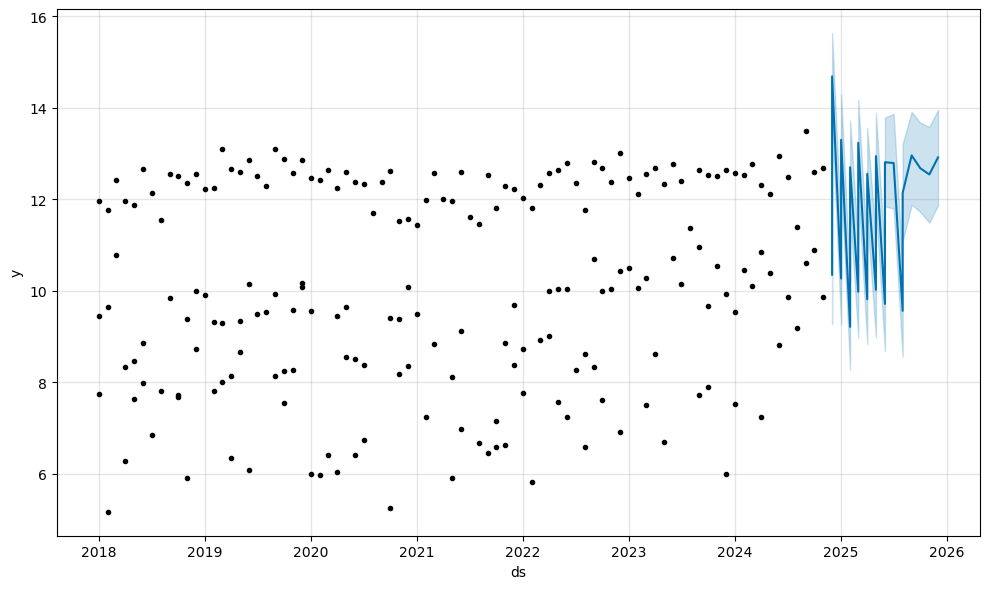

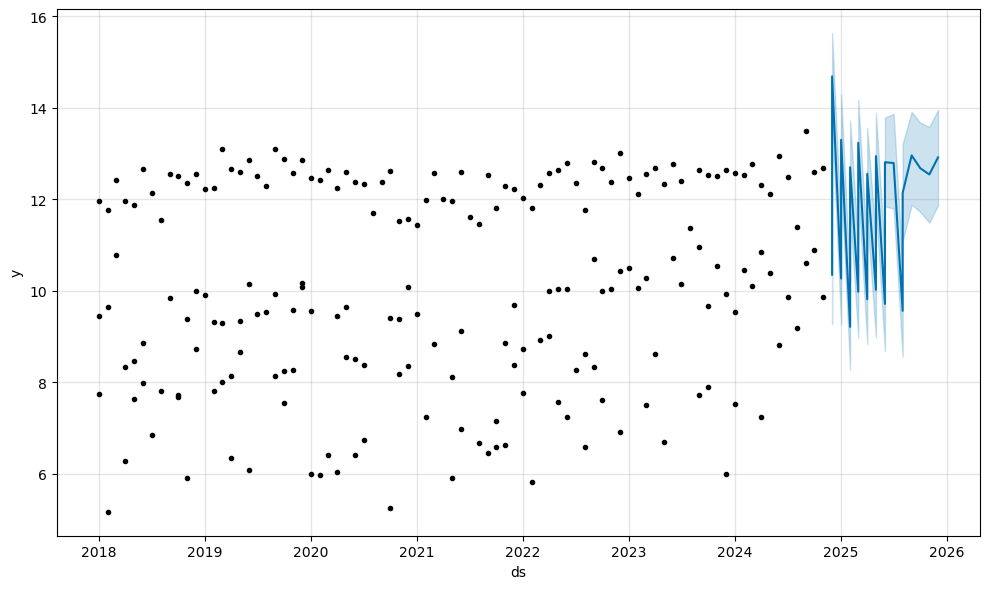

In [151]:
model.plot(forecast_data)

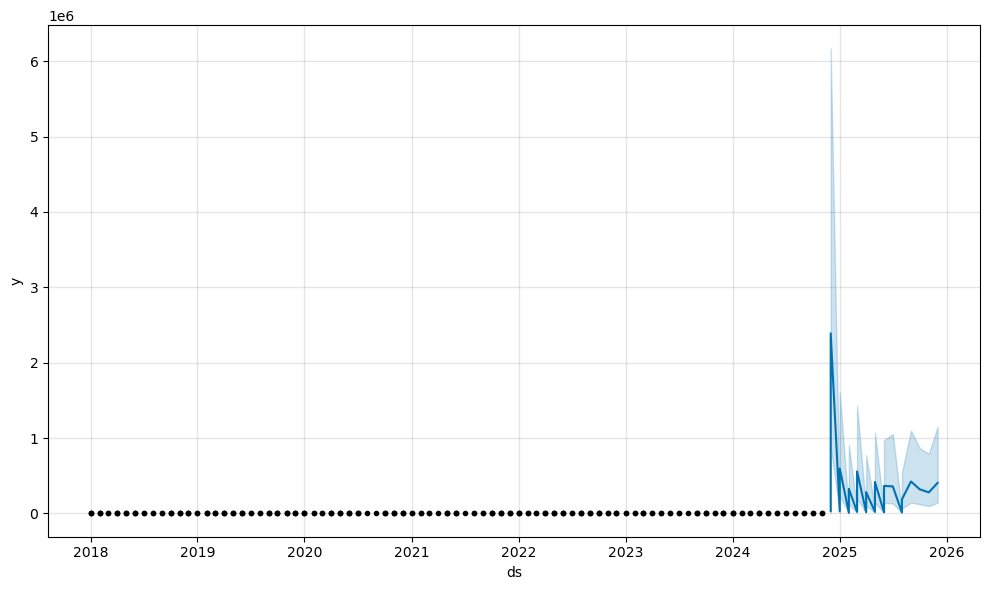

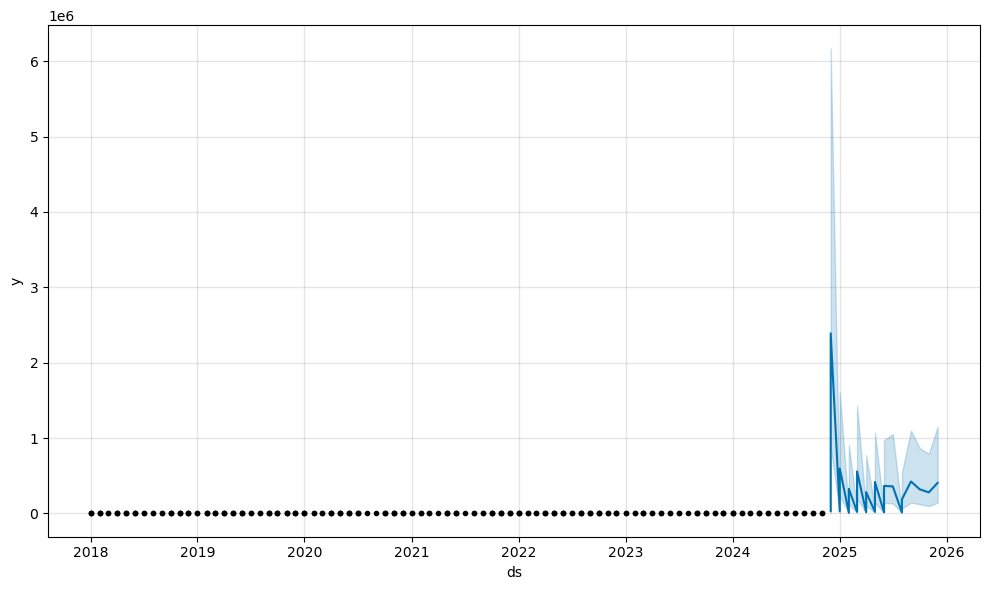

In [152]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

model.plot(forecast_data_orig)

In [153]:
final_df = pd.DataFrame(forecast_data_orig)
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df_test["y"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'

In [155]:
final_df.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,BACKLOG EUR,BACKLOG EUR_lower,BACKLOG EUR_upper,Blg Total Qty,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-12-01,9.765381,10717.896125,8.538030e+04,9.765381,9.765381,-0.228341,-0.228341,-0.228341,-0.057049,...,0.067568,0.067568,0.067568,0.517430,0.517430,0.517430,0.0,0.0,0.0,3.126892e+04
1,2024-12-01,9.765381,881604.319534,6.170041e+06,9.765231,9.765540,1.681928,1.681928,1.681928,0.053083,...,4.404391,4.404391,4.404391,0.517430,0.517430,0.517430,0.0,0.0,0.0,2.390952e+06
2,2025-01-01,9.782065,10554.203707,8.358930e+04,9.781613,9.782507,-0.228784,-0.228784,-0.228784,-0.053792,...,0.070383,0.070383,0.070383,0.413122,0.413122,0.413122,0.0,0.0,0.0,2.872636e+04
3,2025-01-01,9.782065,227764.910316,1.611946e+06,9.781169,9.782902,0.445614,0.445614,0.445614,-0.011526,...,3.103468,3.103468,3.103468,0.413122,0.413122,0.413122,0.0,0.0,0.0,5.963931e+05
4,2025-02-01,9.798749,3885.372874,2.706787e+04,9.797220,9.800127,-0.238344,-0.238344,-0.238344,-0.054750,...,0.059864,0.059864,0.059864,-0.649528,-0.649528,-0.649528,0.0,0.0,0.0,9.987459e+03


In [156]:
final_df.columns.values

array(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower',
       'trend_upper', 'BACKLOG EUR', 'BACKLOG EUR_lower',
       'BACKLOG EUR_upper', 'Blg Total Qty', 'Blg Total Qty_lower',
       'Blg Total Qty_upper', 'REGION_AMERICA', 'REGION_AMERICA_lower',
       'REGION_AMERICA_upper', 'REGION_ASIA', 'REGION_ASIA_lower',
       'REGION_ASIA_upper', 'REGION_EUROPE', 'REGION_EUROPE_lower',
       'REGION_EUROPE_upper', 'additive_terms', 'additive_terms_lower',
       'additive_terms_upper', 'extra_regressors_additive',
       'extra_regressors_additive_lower',
       'extra_regressors_additive_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype=object)

In [157]:
df1 = final_df[["ds","yhat","yhat_upper","yhat_lower"]]

In [159]:
df1.head()

,ds,yhat,yhat_upper,yhat_lower
0,2024-12-01,3.126892e+04,8.538030e+04,10717.896125
1,2024-12-01,2.390952e+06,6.170041e+06,881604.319534
2,2025-01-01,2.872636e+04,8.358930e+04,10554.203707
3,2025-01-01,5.963931e+05,1.611946e+06,227764.910316
4,2025-02-01,9.987459e+03,2.706787e+04,3885.372874


In [70]:
df_test = df_test.reset_index(drop=True)

In [71]:
df_test.head()

,ds,y,Blg Total Qty,BACKLOG EUR,REGION_AMERICA,REGION_ASIA,REGION_EUROPE
0,2024-01-01,105918.61,73363,123463.564050,1.0,0.0,0.0
1,2024-01-01,85663.81,57086,118313.194545,0.0,1.0,0.0
2,2024-01-01,941148.30,1094973,860672.235454,0.0,0.0,1.0
3,2024-02-01,147796.73,114606,216604.855082,1.0,0.0,0.0
4,2024-02-01,112261.39,23036,83200.306381,0.0,1.0,0.0


In [72]:
df1.shape,df_test.shape

((35, 4), (35, 7))

In [73]:
# Joindre les deux DataFrames sur l'index
df1 = df1.join(df_test, rsuffix='_test')

In [74]:
df1.head(10)

,ds,yhat,yhat_upper,yhat_lower,ds_test,y,Blg Total Qty,BACKLOG EUR,REGION_AMERICA,REGION_ASIA,REGION_EUROPE
0,2024-01-01,1.431592e+05,2.201847e+05,9.276475e+04,2024-01-01,105918.61,73363,1.234636e+05,1.0,0.0,0.0
1,2024-01-01,1.255497e+05,1.999621e+05,7.935330e+04,2024-01-01,85663.81,57086,1.183132e+05,0.0,1.0,0.0
2,2024-01-01,9.163336e+05,1.479367e+06,5.955384e+05,2024-01-01,941148.30,1094973,8.606722e+05,0.0,0.0,1.0
3,2024-02-01,1.532429e+05,2.424505e+05,9.820199e+04,2024-02-01,147796.73,114606,2.166049e+05,1.0,0.0,0.0
4,2024-02-01,1.202329e+05,1.850263e+05,7.365206e+04,2024-02-01,112261.39,23036,8.320031e+04,0.0,1.0,0.0
5,2024-02-01,1.354582e+06,2.180478e+06,8.817653e+05,2024-02-01,869037.84,1199633,1.386668e+06,0.0,0.0,1.0
6,2024-03-01,2.152459e+05,3.499073e+05,1.339271e+05,2024-03-01,313389.14,134161,2.856044e+05,1.0,0.0,0.0
7,2024-03-01,1.703320e+05,2.688779e+05,1.083127e+05,2024-03-01,194773.54,76599,1.509479e+05,0.0,1.0,0.0
8,2024-03-01,1.766570e+06,2.779312e+06,1.114882e+06,2024-03-01,1436055.50,1399048,1.279568e+06,0.0,0.0,1.0
9,2024-04-01,1.438574e+05,2.271281e+05,9.164290e+04,2024-04-01,141952.33,131193,2.510671e+05,1.0,0.0,0.0


In [75]:
# Reconstruction de la colonne REGION
df1["REGION"] = df1[["REGION_AMERICA", "REGION_ASIA", "REGION_EUROPE"]].idxmax(axis=1)
df1["REGION"] = df1["REGION"].str.replace("REGION_", "")

# Suppression des colonnes one-hot encodées (facultatif)
df1 = df1.drop(columns=["REGION_AMERICA", "REGION_ASIA", "REGION_EUROPE"])

In [76]:
df1.head(10)

,ds,yhat,yhat_upper,yhat_lower,ds_test,y,Blg Total Qty,BACKLOG EUR,REGION
0,2024-01-01,1.431592e+05,2.201847e+05,9.276475e+04,2024-01-01,105918.61,73363,1.234636e+05,AMERICA
1,2024-01-01,1.255497e+05,1.999621e+05,7.935330e+04,2024-01-01,85663.81,57086,1.183132e+05,ASIA
2,2024-01-01,9.163336e+05,1.479367e+06,5.955384e+05,2024-01-01,941148.30,1094973,8.606722e+05,EUROPE
3,2024-02-01,1.532429e+05,2.424505e+05,9.820199e+04,2024-02-01,147796.73,114606,2.166049e+05,AMERICA
4,2024-02-01,1.202329e+05,1.850263e+05,7.365206e+04,2024-02-01,112261.39,23036,8.320031e+04,ASIA
5,2024-02-01,1.354582e+06,2.180478e+06,8.817653e+05,2024-02-01,869037.84,1199633,1.386668e+06,EUROPE
6,2024-03-01,2.152459e+05,3.499073e+05,1.339271e+05,2024-03-01,313389.14,134161,2.856044e+05,AMERICA
7,2024-03-01,1.703320e+05,2.688779e+05,1.083127e+05,2024-03-01,194773.54,76599,1.509479e+05,ASIA
8,2024-03-01,1.766570e+06,2.779312e+06,1.114882e+06,2024-03-01,1436055.50,1399048,1.279568e+06,EUROPE
9,2024-04-01,1.438574e+05,2.271281e+05,9.164290e+04,2024-04-01,141952.33,131193,2.510671e+05,AMERICA


In [77]:
df2 = df1[['ds','yhat','yhat_upper','yhat_lower','y','BACKLOG EUR',]]

In [78]:
df2.head()

,ds,yhat,yhat_upper,yhat_lower,y,BACKLOG EUR
0,2024-01-01,143159.228701,2.201847e+05,92764.746682,105918.61,123463.564050
1,2024-01-01,125549.654214,1.999621e+05,79353.296976,85663.81,118313.194545
2,2024-01-01,916333.559734,1.479367e+06,595538.369976,941148.30,860672.235454
3,2024-02-01,153242.899207,2.424505e+05,98201.986167,147796.73,216604.855082
4,2024-02-01,120232.898157,1.850263e+05,73652.064644,112261.39,83200.306381


In [1890]:
df1_grouped = df2.groupby("ds", as_index=False).sum()

In [1892]:
df1_grouped.head()

,ds,yhat,yhat_upper,yhat_lower,y,BACKLOG EUR
0,2024-01-01,7.985019e+05,1.154635e+06,554276.567678,940237.74,1.010498e+06
1,2024-02-01,8.304088e+05,1.179130e+06,573231.350615,1050175.70,9.703460e+05
2,2024-03-01,1.069434e+06,1.561146e+06,736859.496981,1502574.58,1.383811e+06
3,2024-04-01,7.779786e+05,1.124322e+06,542265.586404,1077591.38,1.031625e+06
4,2024-05-01,8.118716e+05,1.183804e+06,554489.504053,849160.36,9.755486e+05


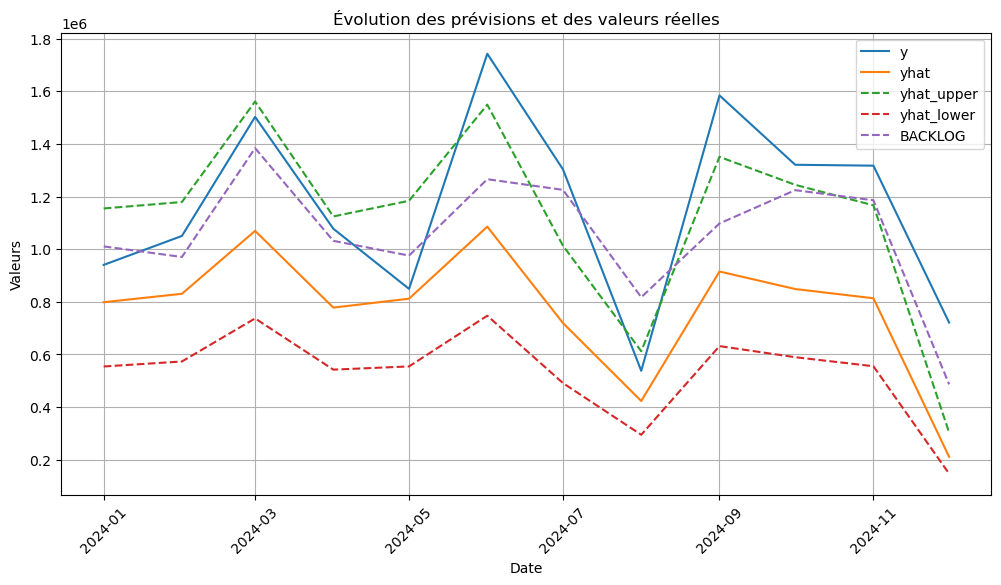

In [1894]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création du graphique
plt.figure(figsize=(12, 6))

# Tracer les lignes pour chaque colonne
sns.lineplot(data=df1_grouped, x="ds", y="y", label="y")
sns.lineplot(data=df1_grouped, x="ds", y="yhat", label="yhat")
sns.lineplot(data=df1_grouped, x="ds", y="yhat_upper", label="yhat_upper", linestyle="dashed")
sns.lineplot(data=df1_grouped, x="ds", y="yhat_lower", label="yhat_lower", linestyle="dashed")
sns.lineplot(data=df1_grouped, x="ds", y="BACKLOG EUR", label="BACKLOG", linestyle="dashed")

# Personnalisation
plt.xlabel("Date")
plt.ylabel("Valeurs")
plt.title("Évolution des prévisions et des valeurs réelles")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()


In [1895]:
df_test.shape , final_df.shape

((35, 7), (35, 34))

In [1898]:
df_test = df_test.reset_index(drop=True)

In [1900]:
df_test.tail()

,ds,y,Blg Total Qty,BACKLOG EUR,REGION_AMERICA,REGION_ASIA,REGION_EUROPE
30,2024-11-01,540721.43,82510,416941.14236,1.0,0.0,0.0
31,2024-11-01,45611.21,27550,34477.25966,0.0,1.0,0.0
32,2024-11-01,730896.71,279538,734296.70465,0.0,0.0,1.0
33,2024-12-01,643565.83,80935,451587.54547,1.0,0.0,0.0
34,2024-12-01,77280.60,30890,34711.58156,0.0,1.0,0.0


In [1902]:
final_df.columns.values

array(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower',
       'trend_upper', 'BACKLOG EUR', 'BACKLOG EUR_lower',
       'BACKLOG EUR_upper', 'Blg Total Qty', 'Blg Total Qty_lower',
       'Blg Total Qty_upper', 'REGION_AMERICA', 'REGION_AMERICA_lower',
       'REGION_AMERICA_upper', 'REGION_ASIA', 'REGION_ASIA_lower',
       'REGION_ASIA_upper', 'REGION_EUROPE', 'REGION_EUROPE_lower',
       'REGION_EUROPE_upper', 'additive_terms', 'additive_terms_lower',
       'additive_terms_upper', 'extra_regressors_additive',
       'extra_regressors_additive_lower',
       'extra_regressors_additive_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype=object)